# K-Means Clustering Algorithm - Unsupervised Learning 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

# show all rows and all columns
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [13]:
df = pd.read_excel(r"C:\Users\user\Pictures\PYTHON_PANDAS\income.xlsx")
df

,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [14]:
df.columns

Index(['Name ', 'Age', 'Income'], dtype='object')

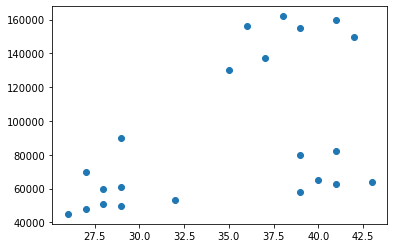

In [16]:
plt.scatter(df["Age"],df["Income"])

# K-Means Algo

In [18]:
from sklearn.cluster import KMeans

In [19]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [20]:
y_pred = km.fit_predict(df[['Age',"Income"]])
y_pred

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [21]:
# add an column that shows the cluster number
df['cluster'] = y_pred
df.head()

,Name,Age,Income,cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


Text(0, 0.5, 'Income')

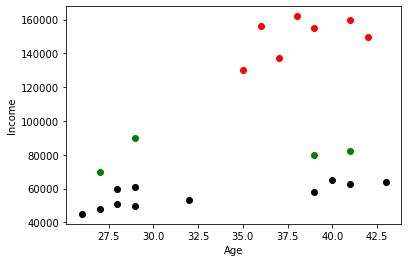

In [24]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1['Age'],df1['Income'],color="green")
plt.scatter(df2['Age'],df2['Income'],color="red")
plt.scatter(df3['Age'],df3['Income'],color="black")

plt.xlabel("Age")
plt.ylabel("Income")

In [26]:
#now we will use scaling

# Feature Scaling - MinMaxScaler

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[["Income"]])
df[['Income']] = scaler.transform(df[["Income"]])

scaler.fit(df[["Age"]])
df[['Age']] = scaler.transform(df[["Age"]])
df

,Name,Age,Income,cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [37]:
#Now again apply algo
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df[['Age',"Income"]])
y_pred
df['cluster'] = y_pred

In [39]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

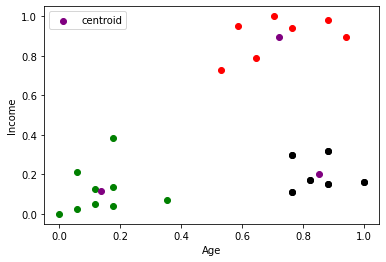

In [40]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1['Age'],df1['Income'],color="green")
plt.scatter(df2['Age'],df2['Income'],color="red")
plt.scatter(df3['Age'],df3['Income'],color="black")
plt.scatter(df3['Age'],df3['Income'],color="black")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="purple",label="centroid")

plt.xlabel("Age")
plt.ylabel("Income")
plt.legend()

In [44]:
#Now we will find correct(best) K value

In [45]:
k_rng = range(1,10)
sse=[]
for k in k_rng :
    km = KMeans(n_clusters=k)
    km.fit(df[['Age',"Income"]])
    sse.append(km.inertia_)
    

In [47]:
sse

[5.434011511988176,
 2.0911363886990766,
 0.4750783498553095,
 0.3491047094419565,
 0.26217927623452125,
 0.22020960864009395,
 0.17840674931327927,
 0.13265419827245162,
 0.10919063774844096]

Text(0, 0.5, 'SUm Of Squared Error')

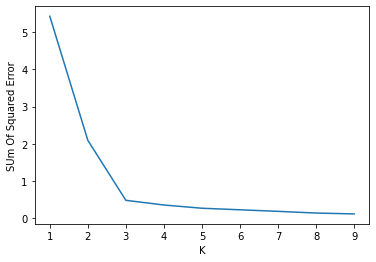

In [48]:
plt.plot(k_rng,sse)
plt.xlabel("K")
plt.ylabel("SUm Of Squared Error")

In [49]:
# according to the graph , k=3 is the best fit value